In [1]:
from gnn_boundary.datasets import *
from gnn_boundary.models import *
from gnn_boundary.utils import *
from gnn_boundary.criteria import *
from gnn_boundary.regularizations import *
from gnn_boundary import Trainer, Evaluator, GraphSampler

import shelve
import torch
import numpy as np

from DatasetWrapper import *
import os
import inspect
import sys

C:\Users\hanne\anaconda3\envs\gnnboundary\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from gnn_boundary.models.linear_gcn_classifier import *

In [3]:
import torch
from tqdm.auto import trange

In [4]:
sys.path.append('../../')
import utility_functions

## Red Ratio Dataset


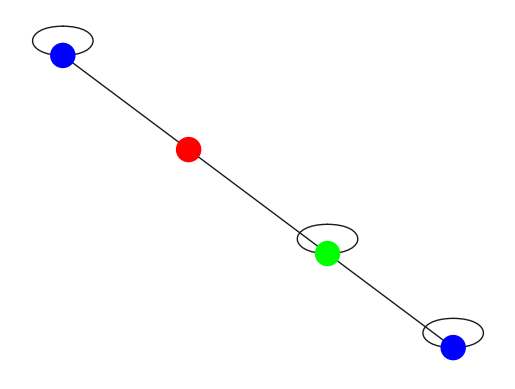

In [5]:
from graph_generation import RedRatioGraphs
redRatioGraphs = RedRatioGraphs.RedRatioGraphs(2000)#.getDataset()
dataset = redRatioGraphs.getDataset()

utility_functions.printGraph(dataset[0])

In [6]:



red_dataset = DatasetWrapper(dataset, num_cls = 2, name = "red_ratio")
red_dataset.y = red_dataset.y.long()
red_train, red_val = red_dataset.train_test_split(k=5)
red_model = LinearGCNClassifier(3,2,16)

In [7]:
for epoch in trange(10):
    train_loss = red_train.model_fit(red_model, lr=0.05)
    train_metrics = red_train.model_evaluate(red_model)
    val_metrics = red_val.model_evaluate(red_model)
    print(f"Epoch: {epoch:03d}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_metrics['acc']:.4f}, "
          f"Test Acc: {val_metrics['acc']:.4f}, "
          f"Train F1: {train_metrics['f1']}, "
          f"Test F1: {val_metrics['f1']}")

  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\hanne\anaconda3\envs\gnnboundary\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
 10%|█         | 1/10 [00:00<00:08,  1.03it/s]

Epoch: 000, Train Loss: 0.0990, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 20%|██        | 2/10 [00:01<00:05,  1.39it/s]

Epoch: 001, Train Loss: 0.0119, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 30%|███       | 3/10 [00:02<00:04,  1.43it/s]

Epoch: 002, Train Loss: 0.0155, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 40%|████      | 4/10 [00:02<00:04,  1.41it/s]

Epoch: 003, Train Loss: 0.0025, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 50%|█████     | 5/10 [00:03<00:03,  1.47it/s]

Epoch: 004, Train Loss: 0.0348, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 60%|██████    | 6/10 [00:04<00:02,  1.51it/s]

Epoch: 005, Train Loss: 0.0207, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 70%|███████   | 7/10 [00:04<00:01,  1.53it/s]

Epoch: 006, Train Loss: 0.0389, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 80%|████████  | 8/10 [00:05<00:01,  1.60it/s]

Epoch: 007, Train Loss: 0.0159, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 90%|█████████ | 9/10 [00:05<00:00,  1.68it/s]

Epoch: 008, Train Loss: 0.0000, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]

Epoch: 009, Train Loss: 0.0001, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


In [8]:
#torch.save(red_model.state_dict(), 'ckpts/red_lr0.05.pt')

## Node Counting Dataset

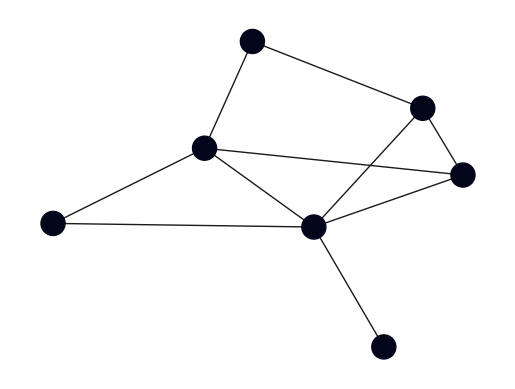

In [14]:
from graph_generation import NodeCountGraphs
nodeCountGraphs = NodeCountGraphs.NodeCountGraphs(2000)#.getDataset()
dataset = nodeCountGraphs.getDataset()

utility_functions.printGraph(dataset[0])

In [10]:
dataset = DatasetWrapper(dataset, num_cls = 2, name = "node_count")
dataset.y = dataset.y.long()
train, val = dataset.train_test_split(k=5)
model = LinearGCNClassifier(1,2,16)

In [11]:
for epoch in trange(10):
    train_loss = train.model_fit(model, lr=0.05)
    train_metrics = train.model_evaluate(model)
    val_metrics = val.model_evaluate(model)
    print(f"Epoch: {epoch:03d}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_metrics['acc']:.4f}, "
          f"Test Acc: {val_metrics['acc']:.4f}, "
          f"Train F1: {train_metrics['f1']}, "
          f"Test F1: {val_metrics['f1']}")

 10%|█         | 1/10 [00:00<00:07,  1.13it/s]

Epoch: 000, Train Loss: 0.4597, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 20%|██        | 2/10 [00:01<00:05,  1.46it/s]

Epoch: 001, Train Loss: 0.1318, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 30%|███       | 3/10 [00:01<00:04,  1.63it/s]

Epoch: 002, Train Loss: 0.0779, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 40%|████      | 4/10 [00:02<00:03,  1.70it/s]

Epoch: 003, Train Loss: 0.1136, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 50%|█████     | 5/10 [00:03<00:03,  1.56it/s]

Epoch: 004, Train Loss: 0.0770, Train Acc: 0.9231, Test Acc: 0.9125, Train F1: {0: 0.925499677658081, 1: 0.9205939173698425}, Test F1: {0: 0.9061661958694458, 1: 0.9180327653884888}


 60%|██████    | 6/10 [00:03<00:02,  1.48it/s]

Epoch: 005, Train Loss: 0.0944, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 70%|███████   | 7/10 [00:04<00:02,  1.39it/s]

Epoch: 006, Train Loss: 0.0572, Train Acc: 0.9231, Test Acc: 0.9125, Train F1: {0: 0.925499677658081, 1: 0.9205939173698425}, Test F1: {0: 0.9061661958694458, 1: 0.9180327653884888}


 80%|████████  | 8/10 [00:05<00:01,  1.49it/s]

Epoch: 007, Train Loss: 0.0951, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 90%|█████████ | 9/10 [00:06<00:00,  1.38it/s]

Epoch: 008, Train Loss: 0.0919, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


100%|██████████| 10/10 [00:06<00:00,  1.44it/s]

Epoch: 009, Train Loss: 0.0842, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


In [12]:
#torch.save(model.state_dict(), 'ckpts/count_lr0.05.pt')

## Multi Grid Graph Dataset

In [13]:
from graph_generation import MultiGraphs

dataset = MultiGraphs.MultiGraphs(10000, negative_class=True).getDataset()

multi_dataset = DatasetWrapper(dataset, num_cls = 4, name="multi_graph")
multi_dataset.y = multi_dataset.y.long()
multi_train, multi_val = multi_dataset.train_test_split(k=5)
multi_model = GCNClassifier(node_features=3,
                            num_classes=4,
                            hidden_channels=32,
                            num_layers=3)

In [14]:
for epoch in trange(50):
    train_loss = multi_train.model_fit(multi_model, lr=0.01)
    train_metrics = multi_train.model_evaluate(multi_model)
    val_metrics = multi_val.model_evaluate(multi_model)
    if epoch >= 15 and train_metrics["acc"] == 1.0 and  val_metrics['acc'] == 1.0:
        print(f"epoch {epoch}")
        break
    print(f"Epoch: {epoch:03d}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_metrics['acc']:.4f}, "
          f"Test Acc: {val_metrics['acc']:.4f}, "
          f"Train F1: {train_metrics['f1']}, "
          f"Test F1: {val_metrics['f1']}")

  2%|▏         | 1/50 [00:14<12:04, 14.79s/it]

Epoch: 000, Train Loss: 1.3571, Train Acc: 0.4731, Test Acc: 0.4765, Train F1: {0: 0.8609556555747986, 1: 0.4854500889778137, 2: 0.0, 3: 0.0}, Test F1: {0: 0.8688097596168518, 1: 0.4899945855140686, 2: 0.0, 3: 0.0}


  4%|▍         | 2/50 [00:24<09:20, 11.67s/it]

Epoch: 001, Train Loss: 0.7955, Train Acc: 0.8450, Test Acc: 0.8340, Train F1: {0: 0.9940357804298401, 1: 0.8837314248085022, 2: 0.7729439735412598, 3: 0.7183166146278381}, Test F1: {0: 0.9920634627342224, 1: 0.8734402656555176, 2: 0.7469586133956909, 3: 0.7080152630805969}


  6%|▌         | 3/50 [00:34<08:34, 10.95s/it]

Epoch: 002, Train Loss: 0.1373, Train Acc: 0.9981, Test Acc: 0.9980, Train F1: {0: 1.0, 1: 0.9972423911094666, 2: 0.9987515807151794, 3: 0.9965052604675293}, Test F1: {0: 1.0, 1: 0.9979959726333618, 2: 0.9980040192604065, 3: 0.9959999918937683}


  8%|▊         | 4/50 [00:42<07:25,  9.68s/it]

Epoch: 003, Train Loss: 0.0349, Train Acc: 0.9999, Test Acc: 0.9995, Train F1: {0: 1.0, 1: 0.9997500777244568, 2: 1.0, 3: 0.9997499585151672}, Test F1: {0: 1.0, 1: 0.9990010261535645, 2: 1.0, 3: 0.9989989995956421}


 10%|█         | 5/50 [00:50<06:49,  9.11s/it]

Epoch: 004, Train Loss: 0.0346, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 12%|█▏        | 6/50 [00:57<06:14,  8.50s/it]

Epoch: 005, Train Loss: 0.0206, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 14%|█▍        | 7/50 [01:05<05:53,  8.21s/it]

Epoch: 006, Train Loss: 0.0645, Train Acc: 0.9908, Test Acc: 0.9885, Train F1: {0: 0.988875150680542, 1: 0.9821652770042419, 2: 0.9989989995956421, 3: 0.9929612874984741}, Test F1: {0: 0.9891197085380554, 1: 0.9779559373855591, 2: 1.0, 3: 0.9868819117546082}


 16%|█▌        | 8/50 [01:12<05:31,  7.90s/it]

Epoch: 007, Train Loss: 0.0480, Train Acc: 0.8900, Test Acc: 0.8775, Train F1: {0: 0.9557945132255554, 1: 0.7577639818191528, 2: 0.9906777739524841, 3: 0.8361435532569885}, Test F1: {0: 0.9469696879386902, 1: 0.7293519973754883, 2: 0.9796333909034729, 3: 0.8289361596107483}


 18%|█▊        | 9/50 [01:19<05:18,  7.78s/it]

Epoch: 008, Train Loss: 0.0364, Train Acc: 0.8805, Test Acc: 0.8790, Train F1: {0: 0.714239776134491, 1: 0.9672494530677795, 2: 0.9940298795700073, 3: 0.8198835253715515}, Test F1: {0: 0.7309644818305969, 1: 0.9504373073577881, 2: 0.9959999918937683, 3: 0.8165680766105652}


 20%|██        | 10/50 [01:27<05:03,  7.59s/it]

Epoch: 009, Train Loss: 0.0593, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 22%|██▏       | 11/50 [01:34<04:57,  7.64s/it]

Epoch: 010, Train Loss: 0.0292, Train Acc: 0.9996, Test Acc: 1.0000, Train F1: {0: 0.9997499585151672, 1: 0.999250590801239, 2: 0.9997499585151672, 3: 0.9997499585151672}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 24%|██▍       | 12/50 [01:43<04:58,  7.87s/it]

Epoch: 011, Train Loss: 0.0330, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 26%|██▌       | 13/50 [01:50<04:47,  7.78s/it]

Epoch: 012, Train Loss: 0.0285, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 28%|██▊       | 14/50 [01:58<04:34,  7.62s/it]

Epoch: 013, Train Loss: 0.0242, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 30%|███       | 15/50 [02:06<04:33,  7.81s/it]

Epoch: 014, Train Loss: 0.0271, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}, Test F1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0}


 32%|███▏      | 16/50 [02:13<04:17,  7.58s/it]

Epoch: 015, Train Loss: 0.0533, Train Acc: 0.9985, Test Acc: 0.9985, Train F1: {0: 0.9994997382164001, 1: 0.9982522130012512, 2: 0.9980019927024841, 3: 0.9982469081878662}, Test F1: {0: 1.0, 1: 0.9980040192604065, 2: 0.9990010261535645, 3: 0.996990978717804}


 32%|███▏      | 16/50 [02:20<04:59,  8.80s/it]

epoch 16


In [15]:
#torch.save(multi_model.state_dict(), 'ckpts/multi_grids_lr0.05.pt')

## Grid Graphs

In [17]:
from graph_generation import GridGraphs

dataset = GridGraphs.GridGraphs(5000).getDataset()

multi_dataset = DatasetWrapper(dataset, num_cls = 2, name="grid_graphs")
multi_dataset.y = multi_dataset.y.long()
multi_train, multi_val = multi_dataset.train_test_split(k=5)
multi_model = GCNClassifier(node_features=3,
                            num_classes=2,
                            hidden_channels=16,
                            num_layers=3)

In [18]:
for epoch in trange(50):
    train_loss = multi_train.model_fit(multi_model, lr=0.01)
    train_metrics = multi_train.model_evaluate(multi_model)
    val_metrics = multi_val.model_evaluate(multi_model)
    if epoch >= 15 and train_metrics["acc"] == 1.0 and  val_metrics['acc'] == 1.0:
        print(f"epoch {epoch}")
        break
    print(f"Epoch: {epoch:03d}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_metrics['acc']:.4f}, "
          f"Test Acc: {val_metrics['acc']:.4f}, "
          f"Train F1: {train_metrics['f1']}, "
          f"Test F1: {val_metrics['f1']}")

  2%|▏         | 1/50 [00:05<04:14,  5.19s/it]

Epoch: 000, Train Loss: 0.5863, Train Acc: 0.8290, Test Acc: 0.8520, Train F1: {0: 0.7952095866203308, 1: 0.8532189130783081}, Test F1: {0: 0.8262910842895508, 1: 0.8710801601409912}


  4%|▍         | 2/50 [00:08<03:19,  4.15s/it]

Epoch: 001, Train Loss: 0.1387, Train Acc: 0.9930, Test Acc: 0.9960, Train F1: {0: 0.9929506778717041, 1: 0.9930486679077148}, Test F1: {0: 0.9959839582443237, 1: 0.9960159659385681}


  6%|▌         | 3/50 [00:12<03:11,  4.08s/it]

Epoch: 002, Train Loss: 0.0788, Train Acc: 0.9825, Test Acc: 0.9900, Train F1: {0: 0.9821882843971252, 1: 0.9828009605407715}, Test F1: {0: 0.9898989796638489, 1: 0.9900990128517151}


  8%|▊         | 4/50 [00:16<03:07,  4.08s/it]

Epoch: 003, Train Loss: 0.0731, Train Acc: 0.9962, Test Acc: 0.9980, Train F1: {0: 0.996241569519043, 1: 0.9962584376335144}, Test F1: {0: 0.9979959726333618, 1: 0.9980040192604065}


 10%|█         | 5/50 [00:21<03:15,  4.35s/it]

Epoch: 004, Train Loss: 0.0412, Train Acc: 0.9565, Test Acc: 0.9600, Train F1: {0: 0.9583133459091187, 1: 0.9545217156410217}, Test F1: {0: 0.9615384340286255, 1: 0.9583333134651184}


 12%|█▏        | 6/50 [00:25<02:58,  4.07s/it]

Epoch: 005, Train Loss: 0.0164, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 14%|█▍        | 7/50 [00:28<02:48,  3.92s/it]

Epoch: 006, Train Loss: 0.0421, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 16%|█▌        | 8/50 [00:31<02:33,  3.66s/it]

Epoch: 007, Train Loss: 0.0330, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 18%|█▊        | 9/50 [00:35<02:27,  3.59s/it]

Epoch: 008, Train Loss: 0.0103, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 20%|██        | 10/50 [00:38<02:19,  3.49s/it]

Epoch: 009, Train Loss: 0.0205, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 22%|██▏       | 11/50 [00:41<02:11,  3.38s/it]

Epoch: 010, Train Loss: 0.0260, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 24%|██▍       | 12/50 [00:44<02:07,  3.35s/it]

Epoch: 011, Train Loss: 0.0499, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 26%|██▌       | 13/50 [00:48<02:02,  3.31s/it]

Epoch: 012, Train Loss: 0.0070, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 28%|██▊       | 14/50 [00:51<02:01,  3.37s/it]

Epoch: 013, Train Loss: 0.0071, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 30%|███       | 15/50 [00:54<01:56,  3.33s/it]

Epoch: 014, Train Loss: 0.0147, Train Acc: 1.0000, Test Acc: 1.0000, Train F1: {0: 1.0, 1: 1.0}, Test F1: {0: 1.0, 1: 1.0}


 32%|███▏      | 16/50 [00:57<01:50,  3.26s/it]

Epoch: 015, Train Loss: 0.0577, Train Acc: 0.9998, Test Acc: 1.0000, Train F1: {0: 0.9997499585151672, 1: 0.9997500777244568}, Test F1: {0: 1.0, 1: 1.0}


 32%|███▏      | 16/50 [01:01<02:09,  3.82s/it]

epoch 16


In [19]:
len(multi_val)

1000

In [ ]:
#torch.save(multi_model.state_dict(), 'ckpts/grids.pt')

## House Graphs

In [21]:
from graph_generation import HouseSet

dataset = HouseSet.HouseSetCreator(10000, 30, 2.5*30).getDataset()


[Data(x=[15, 3], edge_index=[2, 12], y=[1])]


In [22]:
dataset = DatasetWrapper(dataset, num_cls = 2, name = "houses")
dataset.y = dataset.y.long()
dataset_train, dataset_val = dataset.train_test_split(k=5)
dataset_model = GCNClassifier(node_features=3,
                            num_classes=2,
                            hidden_channels=32,
                            num_layers=3)

In [23]:
for epoch in trange(50):
    train_loss = dataset_train.model_fit(dataset_model, lr=0.01)
    train_metrics = dataset_train.model_evaluate(dataset_model)
    val_metrics = dataset_val.model_evaluate(dataset_model)
    if epoch >= 15 and train_metrics["acc"] >= 0.95 and  val_metrics['acc'] >= 0.95:
        print(f"epoch {epoch}")
        break
    print(f"Epoch: {epoch:03d}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_metrics['acc']:.4f}, "
          f"Test Acc: {val_metrics['acc']:.4f}, "
          f"Train F1: {train_metrics['f1']}, "
          f"Test F1: {val_metrics['f1']}")

  2%|▏         | 1/50 [00:08<06:59,  8.55s/it]

Epoch: 000, Train Loss: 0.2714, Train Acc: 0.9136, Test Acc: 0.9075, Train F1: {0: 0.7902883291244507, 1: 0.9456119537353516}, Test F1: {0: 0.7718865871429443, 1: 0.9419881105422974}


  4%|▍         | 2/50 [00:15<06:06,  7.64s/it]

Epoch: 001, Train Loss: 0.2036, Train Acc: 0.9354, Test Acc: 0.9220, Train F1: {0: 0.8710401654243469, 1: 0.9568843245506287}, Test F1: {0: 0.8446215391159058, 1: 0.9479305744171143}


  6%|▌         | 3/50 [00:22<05:44,  7.34s/it]

Epoch: 002, Train Loss: 0.1850, Train Acc: 0.9341, Test Acc: 0.9345, Train F1: {0: 0.8539761900901794, 1: 0.95746910572052}, Test F1: {0: 0.8529741764068604, 1: 0.9578642845153809}


  8%|▊         | 4/50 [00:29<05:32,  7.23s/it]

Epoch: 003, Train Loss: 0.1804, Train Acc: 0.9414, Test Acc: 0.9340, Train F1: {0: 0.8775776624679565, 1: 0.9614594578742981}, Test F1: {0: 0.8601694703102112, 1: 0.9568063020706177}


 10%|█         | 5/50 [00:36<05:15,  7.01s/it]

Epoch: 004, Train Loss: 0.1859, Train Acc: 0.9106, Test Acc: 0.9020, Train F1: {0: 0.7824764251708984, 1: 0.9437583684921265}, Test F1: {0: 0.7549999952316284, 1: 0.9387500286102295}


 12%|█▏        | 6/50 [00:43<05:10,  7.06s/it]

Epoch: 005, Train Loss: 0.1732, Train Acc: 0.9349, Test Acc: 0.9255, Train F1: {0: 0.8725226521492004, 1: 0.9562662839889526}, Test F1: {0: 0.8529121279716492, 1: 0.9501171708106995}


 14%|█▍        | 7/50 [00:50<04:59,  6.96s/it]

Epoch: 006, Train Loss: 0.1691, Train Acc: 0.9370, Test Acc: 0.9330, Train F1: {0: 0.8635625243186951, 1: 0.9590443968772888}, Test F1: {0: 0.8517699241638184, 1: 0.9567183256149292}


 16%|█▌        | 8/50 [00:56<04:45,  6.79s/it]

Epoch: 007, Train Loss: 0.1678, Train Acc: 0.9314, Test Acc: 0.9230, Train F1: {0: 0.8676151633262634, 1: 0.9536826014518738}, Test F1: {0: 0.8504854440689087, 1: 0.9481481313705444}


 18%|█▊        | 9/50 [01:03<04:43,  6.90s/it]

Epoch: 008, Train Loss: 0.1580, Train Acc: 0.9399, Test Acc: 0.9315, Train F1: {0: 0.8791760802268982, 1: 0.9599800109863281}, Test F1: {0: 0.8600612878799438, 1: 0.9546507596969604}


 20%|██        | 10/50 [01:10<04:30,  6.76s/it]

Epoch: 009, Train Loss: 0.1563, Train Acc: 0.9414, Test Acc: 0.9345, Train F1: {0: 0.8701909780502319, 1: 0.9621376991271973}, Test F1: {0: 0.8523111343383789, 1: 0.9579184055328369}


 22%|██▏       | 11/50 [01:18<04:37,  7.11s/it]

Epoch: 010, Train Loss: 0.1769, Train Acc: 0.9268, Test Acc: 0.9250, Train F1: {0: 0.8632757663726807, 1: 0.9499744176864624}, Test F1: {0: 0.8582230806350708, 1: 0.9490142464637756}


 24%|██▍       | 12/50 [01:24<04:26,  7.02s/it]

Epoch: 011, Train Loss: 0.1728, Train Acc: 0.9236, Test Acc: 0.9235, Train F1: {0: 0.8582695722579956, 1: 0.9477286338806152}, Test F1: {0: 0.8563380241394043, 1: 0.9478705525398254}


 26%|██▌       | 13/50 [01:31<04:17,  6.96s/it]

Epoch: 012, Train Loss: 0.1768, Train Acc: 0.9426, Test Acc: 0.9400, Train F1: {0: 0.8742809891700745, 1: 0.9628310203552246}, Test F1: {0: 0.8663697242736816, 1: 0.9613152742385864}


 28%|██▊       | 14/50 [01:38<04:05,  6.83s/it]

Epoch: 013, Train Loss: 0.1721, Train Acc: 0.9452, Test Acc: 0.9365, Train F1: {0: 0.8862928152084351, 1: 0.963944673538208}, Test F1: {0: 0.8670157194137573, 1: 0.9582923054695129}


 30%|███       | 15/50 [01:44<03:54,  6.71s/it]

Epoch: 014, Train Loss: 0.1682, Train Acc: 0.9417, Test Acc: 0.9365, Train F1: {0: 0.8673120737075806, 1: 0.962684154510498}, Test F1: {0: 0.852838933467865, 1: 0.9595154523849487}


 32%|███▏      | 16/50 [01:51<03:53,  6.87s/it]

Epoch: 015, Train Loss: 0.1482, Train Acc: 0.9246, Test Acc: 0.9180, Train F1: {0: 0.8186466097831726, 1: 0.952426016330719}, Test F1: {0: 0.7985258102416992, 1: 0.9485247731208801}


 34%|███▍      | 17/50 [01:58<03:41,  6.71s/it]

Epoch: 016, Train Loss: 0.1454, Train Acc: 0.9494, Test Acc: 0.9465, Train F1: {0: 0.8940067887306213, 1: 0.9667460322380066}, Test F1: {0: 0.8853161931037903, 1: 0.9651125073432922}


 36%|███▌      | 18/50 [02:05<03:37,  6.79s/it]

Epoch: 017, Train Loss: 0.1456, Train Acc: 0.9446, Test Acc: 0.9430, Train F1: {0: 0.878463625907898, 1: 0.9641440510749817}, Test F1: {0: 0.8724831938743591, 1: 0.9632968306541443}


 38%|███▊      | 19/50 [02:11<03:27,  6.68s/it]

Epoch: 018, Train Loss: 0.1535, Train Acc: 0.9256, Test Acc: 0.9165, Train F1: {0: 0.8211601972579956, 1: 0.9530497789382935}, Test F1: {0: 0.7930607199668884, 1: 0.9476981163024902}


 40%|████      | 20/50 [02:18<03:24,  6.82s/it]

Epoch: 019, Train Loss: 0.1504, Train Acc: 0.9299, Test Acc: 0.9270, Train F1: {0: 0.835048496723175, 1: 0.9554726481437683}, Test F1: {0: 0.825775682926178, 1: 0.9538266658782959}


 40%|████      | 20/50 [02:25<03:38,  7.27s/it]

epoch 20


In [24]:
print(train_metrics['acc'])
print(val_metrics['acc'])

0.9556249976158142
0.9509999752044678


In [ ]:
#torch.save(dataset_model.state_dict(), 'ckpts/house.pt')

## Duo Graph

In [5]:
#from graph_generation import GraphGenR
from graph_generation import DuoSet

In [32]:
dataset = DuoSet.DuoSetCreator(5000,50,True, deterministicClass=True).getDataset()

Generated graph with ID: dc38774c-65ab-4f8a-bb10-5cbd1857ecc7
With class: [6]

Generated graph with ID: d52dc03f-de53-486d-b447-4aca1c3391ee
With class: [1]

Generated graph with ID: 482c3d05-f719-446a-b611-11a0103aaf4d
With class: [1]

Generated graph with ID: 9f6c8415-a1a1-4878-89f6-0eca3465f8e3
With class: [0]

Generated graph with ID: a6a78838-a732-4732-a993-a10a47fdf662
With class: [0]

Generated graph with ID: 71cb7d69-4e82-4e44-b104-097102f54709
With class: [4]

Generated graph with ID: 1b2f9fb8-c223-4c11-a5a5-972355d3eef1
With class: [1]

Generated graph with ID: 7e29b904-d97c-4266-8eef-b88f24245805
With class: [6]

Generated graph with ID: 2f0d77d4-b040-4409-8f6b-f6e6a06367c3
With class: [1]

Generated graph with ID: 41ffa98f-6046-48af-974c-1eb5278a6301
With class: [0]

Generated graph with ID: 43abb773-46c6-4c9f-9dbc-3a29fa4d1396
With class: [3]

Generated graph with ID: a5c5911f-3650-476a-9972-56087f3ae7d1
With class: [0]

Generated graph with ID: cf91d71f-2a3d-4798-b53e-109

tensor([4])


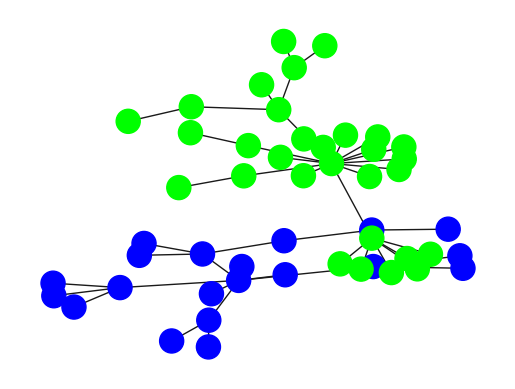

In [29]:
n = 2
data = dataset[n]
print(data.y)
utility_functions.printGraph(data)

In [33]:
from collections import Counter
Counter([data.y.item() for data in dataset])

Counter({0: 2398, 1: 657, 2: 654, 3: 592, 4: 258, 6: 234, 5: 207})

In [51]:
dataset = DatasetWrapper(dataset, num_cls = 7, name = "duo")
dataset.y = dataset.y.long()
dataset_train, dataset_val = dataset.train_test_split(k=5)
dataset_model = GCNClassifier(node_features=3,
                            num_classes=7,
                            hidden_channels=16,
                            num_layers=4)

In [52]:
best_test_acc = 0
for epoch in trange(50):
    train_loss = dataset_train.model_fit(dataset_model, lr=0.01)
    train_metrics = dataset_train.model_evaluate(dataset_model)
    val_metrics = dataset_val.model_evaluate(dataset_model)
    if epoch >= 15 and train_metrics["acc"] >= 0.95 and  val_metrics['acc'] >= 0.95:
        print(f"epoch {epoch}")
        break
    print(f"Epoch: {epoch:03d}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Train Acc: {train_metrics['acc']:.4f}, "
          f"Test Acc: {val_metrics['acc']:.4f}, "
          f"Train F1: {train_metrics['f1']}, "
          f"Test F1: {val_metrics['f1']}")
    if best_test_acc < val_metrics["acc"]:
        best_epoch = epoch
        best_test_acc = val_metrics["acc"]
        torch.save(dataset_model.state_dict(), 'ckpts/duo.pt')
        

  2%|▏         | 1/50 [00:12<09:52, 12.10s/it]

Epoch: 000, Train Loss: 0.8363, Train Acc: 0.8102, Test Acc: 0.7970, Train F1: {0: 0.8658146858215332, 1: 0.7164461016654968, 2: 0.7863247990608215, 3: 0.767657995223999, 4: 0.8009950518608093, 5: 0.7423312664031982, 6: 0.7720364928245544}, Test F1: {0: 0.8528138399124146, 1: 0.6692913174629211, 2: 0.7674418687820435, 3: 0.7709090709686279, 4: 0.7731092572212219, 5: 0.8536585569381714, 6: 0.7272727489471436}


  4%|▍         | 2/50 [00:24<10:00, 12.52s/it]

Epoch: 001, Train Loss: 0.5679, Train Acc: 0.8288, Test Acc: 0.8330, Train F1: {0: 0.8763983845710754, 1: 0.7811321020126343, 2: 0.768831193447113, 3: 0.8126801252365112, 4: 0.7835051417350769, 5: 0.800000011920929, 6: 0.7976878881454468}, Test F1: {0: 0.8683914542198181, 1: 0.7756654024124146, 2: 0.7735191583633423, 3: 0.8339768052101135, 4: 0.7894737124443054, 5: 0.8837209343910217, 6: 0.843137264251709}


  6%|▌         | 3/50 [00:32<07:54, 10.10s/it]

Epoch: 002, Train Loss: 0.5271, Train Acc: 0.8045, Test Acc: 0.8010, Train F1: {0: 0.8846260905265808, 1: 0.5914221405982971, 2: 0.8166214823722839, 3: 0.8187022805213928, 4: 0.8106796145439148, 5: 0.5636672377586365, 6: 0.8365650773048401}, Test F1: {0: 0.8775981664657593, 1: 0.6288209557533264, 2: 0.8100358247756958, 3: 0.800000011920929, 4: 0.8099173307418823, 5: 0.5899280309677124, 6: 0.7916666865348816}


  8%|▊         | 4/50 [00:39<06:53,  9.00s/it]

Epoch: 003, Train Loss: 0.5038, Train Acc: 0.8512, Test Acc: 0.8600, Train F1: {0: 0.8849217295646667, 1: 0.8105646371841431, 2: 0.8191489577293396, 3: 0.8130081295967102, 4: 0.8235294222831726, 5: 0.8258426785469055, 6: 0.8935064673423767}, Test F1: {0: 0.8888888955116272, 1: 0.8260869383811951, 2: 0.8113878965377808, 3: 0.8421052694320679, 4: 0.8166666626930237, 5: 0.8965517282485962, 6: 0.8971962332725525}


 10%|█         | 5/50 [00:44<05:44,  7.65s/it]

Epoch: 004, Train Loss: 0.4867, Train Acc: 0.8468, Test Acc: 0.8470, Train F1: {0: 0.8827508687973022, 1: 0.8240417838096619, 2: 0.8093587756156921, 3: 0.8136585354804993, 4: 0.8701594471931458, 5: 0.7607361674308777, 6: 0.8277778029441833}, Test F1: {0: 0.8732394576072693, 1: 0.8206896781921387, 2: 0.7986111044883728, 3: 0.8359375, 4: 0.859375, 5: 0.8292682766914368, 6: 0.8653846383094788}


 12%|█▏        | 6/50 [00:51<05:18,  7.24s/it]

Epoch: 005, Train Loss: 0.4471, Train Acc: 0.8355, Test Acc: 0.8210, Train F1: {0: 0.8638023138046265, 1: 0.7753036618232727, 2: 0.8085470199584961, 3: 0.8098391890525818, 4: 0.8348214030265808, 5: 0.8347339034080505, 6: 0.8782815933227539}, Test F1: {0: 0.8393063545227051, 1: 0.7540983557701111, 2: 0.7733333110809326, 3: 0.8212927579879761, 4: 0.8661417365074158, 5: 0.8965517282485962, 6: 0.8421052694320679}


 14%|█▍        | 7/50 [00:58<05:14,  7.31s/it]

Epoch: 006, Train Loss: 0.4170, Train Acc: 0.8522, Test Acc: 0.8550, Train F1: {0: 0.8864894509315491, 1: 0.8157669305801392, 2: 0.828519880771637, 3: 0.8041666746139526, 4: 0.8070175647735596, 5: 0.8668407201766968, 6: 0.862533688545227}, Test F1: {0: 0.8850574493408203, 1: 0.8093645572662354, 2: 0.8248175382614136, 3: 0.8360655903816223, 4: 0.7899159789085388, 5: 0.9213483333587646, 6: 0.8761904835700989}


 16%|█▌        | 8/50 [01:05<05:00,  7.16s/it]

Epoch: 007, Train Loss: 0.4592, Train Acc: 0.8365, Test Acc: 0.8290, Train F1: {0: 0.8894486427307129, 1: 0.8188976645469666, 2: 0.7755101919174194, 3: 0.8185185194015503, 4: 0.856447696685791, 5: 0.8235294222831726, 6: 0.5230769515037537}, Test F1: {0: 0.883449912071228, 1: 0.8137931227684021, 2: 0.7702702879905701, 3: 0.8102189898490906, 4: 0.8264462947845459, 5: 0.898876428604126, 6: 0.4722222089767456}


 18%|█▊        | 9/50 [01:14<05:17,  7.74s/it]

Epoch: 008, Train Loss: 0.4514, Train Acc: 0.8443, Test Acc: 0.8450, Train F1: {0: 0.8708106279373169, 1: 0.8240495324134827, 2: 0.8214971423149109, 3: 0.7929515242576599, 4: 0.8565022349357605, 5: 0.8241758346557617, 6: 0.8797953724861145}, Test F1: {0: 0.8629320859909058, 1: 0.8181818127632141, 2: 0.8345864415168762, 3: 0.8042704463005066, 4: 0.8527131676673889, 5: 0.8666666746139526, 6: 0.8807339668273926}


 20%|██        | 10/50 [01:20<04:54,  7.36s/it]

Epoch: 009, Train Loss: 0.3918, Train Acc: 0.8658, Test Acc: 0.8640, Train F1: {0: 0.8950027823448181, 1: 0.8359788656234741, 2: 0.8357400894165039, 3: 0.8398849368095398, 4: 0.8733031749725342, 5: 0.8012048006057739, 6: 0.8865435123443604}, Test F1: {0: 0.8870779871940613, 1: 0.8222996592521667, 2: 0.8382353186607361, 3: 0.8538461327552795, 4: 0.8615384697914124, 5: 0.8571428656578064, 6: 0.8888888955116272}


 22%|██▏       | 11/50 [01:30<05:10,  7.96s/it]

Epoch: 010, Train Loss: 0.3842, Train Acc: 0.8478, Test Acc: 0.8470, Train F1: {0: 0.8663730025291443, 1: 0.8343666791915894, 2: 0.8251748085021973, 3: 0.811700165271759, 4: 0.8616071343421936, 5: 0.8306010961532593, 6: 0.8888888955116272}, Test F1: {0: 0.8571428656578064, 1: 0.8391608595848083, 2: 0.8222996592521667, 3: 0.8175182342529297, 4: 0.8549618124961853, 5: 0.8791208863258362, 6: 0.8928571343421936}


 24%|██▍       | 12/50 [01:36<04:41,  7.42s/it]

Epoch: 011, Train Loss: 0.3781, Train Acc: 0.8618, Test Acc: 0.8570, Train F1: {0: 0.8846370577812195, 1: 0.8083682060241699, 2: 0.8386491537094116, 3: 0.8436516523361206, 4: 0.8616071343421936, 5: 0.8623376488685608, 6: 0.9223057627677917}, Test F1: {0: 0.8757259249687195, 1: 0.8093645572662354, 2: 0.846441924571991, 3: 0.8298755288124084, 4: 0.8461538553237915, 5: 0.8913043737411499, 6: 0.9090909361839294}


 26%|██▌       | 13/50 [01:46<05:02,  8.17s/it]

Epoch: 012, Train Loss: 0.3891, Train Acc: 0.8670, Test Acc: 0.8580, Train F1: {0: 0.8884450793266296, 1: 0.8411552309989929, 2: 0.8442844152450562, 3: 0.8376865386962891, 4: 0.8738738894462585, 5: 0.832402229309082, 6: 0.9154228568077087}, Test F1: {0: 0.8754448294639587, 1: 0.8357142806053162, 2: 0.8333333134651184, 3: 0.8308823704719543, 4: 0.8527131676673889, 5: 0.8764045238494873, 6: 0.9009009003639221}


 28%|██▊       | 14/50 [01:56<05:14,  8.74s/it]

Epoch: 013, Train Loss: 0.3731, Train Acc: 0.8770, Test Acc: 0.8740, Train F1: {0: 0.8955056071281433, 1: 0.845724880695343, 2: 0.842012345790863, 3: 0.8647581338882446, 4: 0.8798186182975769, 5: 0.8829787373542786, 6: 0.9177057147026062}, Test F1: {0: 0.8917346000671387, 1: 0.8487085103988647, 2: 0.8409894108772278, 3: 0.8560311198234558, 4: 0.8615384697914124, 5: 0.9213483333587646, 6: 0.9009009003639221}


 30%|███       | 15/50 [02:04<04:57,  8.51s/it]

Epoch: 014, Train Loss: 0.3951, Train Acc: 0.8695, Test Acc: 0.8640, Train F1: {0: 0.89515221118927, 1: 0.8445642590522766, 2: 0.8305820822715759, 3: 0.8533604741096497, 4: 0.8622221946716309, 5: 0.8516483306884766, 6: 0.8877550959587097}, Test F1: {0: 0.8826290965080261, 1: 0.8480565547943115, 2: 0.8235294222831726, 3: 0.8433734774589539, 4: 0.8549618124961853, 5: 0.9213483333587646, 6: 0.8785046935081482}


 32%|███▏      | 16/50 [02:11<04:39,  8.21s/it]

Epoch: 015, Train Loss: 0.3609, Train Acc: 0.8702, Test Acc: 0.8630, Train F1: {0: 0.8924731016159058, 1: 0.8517178893089294, 2: 0.8254514336585999, 3: 0.8548223376274109, 4: 0.8738738894462585, 5: 0.8603351712226868, 6: 0.8975609540939331}, Test F1: {0: 0.8797169923782349, 1: 0.8519855737686157, 2: 0.808080792427063, 3: 0.8571428656578064, 4: 0.8682170510292053, 5: 0.9090909361839294, 6: 0.8807339668273926}


 34%|███▍      | 17/50 [02:20<04:39,  8.47s/it]

Epoch: 016, Train Loss: 0.4054, Train Acc: 0.8698, Test Acc: 0.8650, Train F1: {0: 0.8926843404769897, 1: 0.8468468189239502, 2: 0.8293578028678894, 3: 0.8524904251098633, 4: 0.8719100952148438, 5: 0.8668407201766968, 6: 0.8867470026016235}, Test F1: {0: 0.8815165758132935, 1: 0.8480565547943115, 2: 0.8351648449897766, 3: 0.8389512896537781, 4: 0.8615384697914124, 5: 0.8913043737411499, 6: 0.9009009003639221}


 36%|███▌      | 18/50 [02:29<04:31,  8.49s/it]

Epoch: 017, Train Loss: 0.3977, Train Acc: 0.8595, Test Acc: 0.8530, Train F1: {0: 0.8826237320899963, 1: 0.8369565010070801, 2: 0.8214285969734192, 3: 0.8379673957824707, 4: 0.8701298832893372, 5: 0.8533333539962769, 6: 0.8761904835700989}, Test F1: {0: 0.8650602698326111, 1: 0.8439716100692749, 2: 0.8127208352088928, 3: 0.8389512896537781, 4: 0.8571428656578064, 5: 0.8913043737411499, 6: 0.8849557638168335}


 38%|███▊      | 19/50 [02:37<04:22,  8.48s/it]

Epoch: 018, Train Loss: 0.3811, Train Acc: 0.8760, Test Acc: 0.8710, Train F1: {0: 0.8998894095420837, 1: 0.8500000238418579, 2: 0.8422001600265503, 3: 0.849372386932373, 4: 0.8656036257743835, 5: 0.8508287072181702, 6: 0.9246231317520142}, Test F1: {0: 0.8960000276565552, 1: 0.8469750881195068, 2: 0.8345323801040649, 3: 0.8477365970611572, 4: 0.859375, 5: 0.8636363744735718, 6: 0.8971962332725525}


 40%|████      | 20/50 [02:47<04:19,  8.65s/it]

Epoch: 019, Train Loss: 0.3779, Train Acc: 0.8808, Test Acc: 0.8720, Train F1: {0: 0.8980982303619385, 1: 0.8525179624557495, 2: 0.8532360792160034, 3: 0.8640308380126953, 4: 0.8953229188919067, 5: 0.8783068656921387, 6: 0.9108911156654358}, Test F1: {0: 0.8891509175300598, 1: 0.8602150678634644, 2: 0.8394160866737366, 3: 0.8484848737716675, 4: 0.8702290058135986, 5: 0.8817204236984253, 6: 0.9009009003639221}


 42%|████▏     | 21/50 [02:53<03:49,  7.91s/it]

Epoch: 020, Train Loss: 0.3921, Train Acc: 0.8662, Test Acc: 0.8690, Train F1: {0: 0.8913043737411499, 1: 0.8504079580307007, 2: 0.8331813812255859, 3: 0.8367347121238708, 4: 0.8732394576072693, 5: 0.8510638475418091, 6: 0.8679245114326477}, Test F1: {0: 0.8902007341384888, 1: 0.8519855737686157, 2: 0.8498168587684631, 3: 0.8370370268821716, 4: 0.8571428656578064, 5: 0.8817204236984253, 6: 0.8771929740905762}


 44%|████▍     | 22/50 [03:02<03:55,  8.41s/it]

Epoch: 021, Train Loss: 0.4063, Train Acc: 0.8823, Test Acc: 0.8750, Train F1: {0: 0.9039484858512878, 1: 0.8587055802345276, 2: 0.8462255597114563, 3: 0.8607842922210693, 4: 0.9033707976341248, 5: 0.8759894371032715, 6: 0.8867470026016235}, Test F1: {0: 0.8943089246749878, 1: 0.8561151027679443, 2: 0.8432835936546326, 3: 0.8461538553237915, 4: 0.8769230842590332, 5: 0.9213483333587646, 6: 0.8771929740905762}


 46%|████▌     | 23/50 [03:10<03:43,  8.28s/it]

Epoch: 022, Train Loss: 0.3904, Train Acc: 0.8652, Test Acc: 0.8550, Train F1: {0: 0.8915923237800598, 1: 0.8487626314163208, 2: 0.7817993760108948, 3: 0.852173924446106, 4: 0.8899082541465759, 5: 0.8306010961532593, 6: 0.9064039587974548}, Test F1: {0: 0.8769574761390686, 1: 0.8413284420967102, 2: 0.7603305578231812, 3: 0.847328245639801, 4: 0.8682170510292053, 5: 0.8791208863258362, 6: 0.9009009003639221}


 48%|████▊     | 24/50 [03:20<03:48,  8.80s/it]

Epoch: 023, Train Loss: 0.3645, Train Acc: 0.8780, Test Acc: 0.8750, Train F1: {0: 0.8979591727256775, 1: 0.8257575631141663, 2: 0.8425047397613525, 3: 0.8680765628814697, 4: 0.9033707976341248, 5: 0.8783068656921387, 6: 0.9223057627677917}, Test F1: {0: 0.897175133228302, 1: 0.8484848737716675, 2: 0.8365018963813782, 3: 0.8537549376487732, 4: 0.8636363744735718, 5: 0.8913043737411499, 6: 0.9009009003639221}


 50%|█████     | 25/50 [03:29<03:40,  8.83s/it]

Epoch: 024, Train Loss: 0.3598, Train Acc: 0.8528, Test Acc: 0.8520, Train F1: {0: 0.8863325119018555, 1: 0.802383303642273, 2: 0.831122875213623, 3: 0.8080593943595886, 4: 0.8590909242630005, 5: 0.8753315806388855, 6: 0.8159645199775696}, Test F1: {0: 0.8782707452774048, 1: 0.8125, 2: 0.8197879791259766, 3: 0.8333333134651184, 4: 0.8527131676673889, 5: 0.9213483333587646, 6: 0.8064516186714172}


 52%|█████▏    | 26/50 [03:43<04:07, 10.32s/it]

Epoch: 025, Train Loss: 0.4010, Train Acc: 0.8665, Test Acc: 0.8640, Train F1: {0: 0.8898163437843323, 1: 0.8271710872650146, 2: 0.8317399621009827, 3: 0.8495393991470337, 4: 0.8758170008659363, 5: 0.8435754179954529, 6: 0.9131513833999634}, Test F1: {0: 0.886310875415802, 1: 0.8231292366981506, 2: 0.8365018963813782, 3: 0.8514056205749512, 4: 0.8571428656578064, 5: 0.8735632300376892, 6: 0.8928571343421936}


 54%|█████▍    | 27/50 [03:51<03:44,  9.74s/it]

Epoch: 026, Train Loss: 0.3535, Train Acc: 0.8750, Test Acc: 0.8680, Train F1: {0: 0.8965517282485962, 1: 0.8480565547943115, 2: 0.8442396521568298, 3: 0.8499496579170227, 4: 0.887417197227478, 5: 0.8455284833908081, 6: 0.9177057147026062}, Test F1: {0: 0.8881118893623352, 1: 0.8461538553237915, 2: 0.8351648449897766, 3: 0.8458498120307922, 4: 0.8636363744735718, 5: 0.8888888955116272, 6: 0.8888888955116272}


 56%|█████▌    | 28/50 [03:57<03:08,  8.55s/it]

Epoch: 027, Train Loss: 0.3578, Train Acc: 0.8717, Test Acc: 0.8640, Train F1: {0: 0.894932746887207, 1: 0.8530207276344299, 2: 0.8323197364807129, 3: 0.8613569140434265, 4: 0.8584269881248474, 5: 0.8709677457809448, 6: 0.8765133023262024}, Test F1: {0: 0.8782815933227539, 1: 0.8530465960502625, 2: 0.8206896781921387, 3: 0.8615384697914124, 4: 0.8682170510292053, 5: 0.9111111164093018, 6: 0.859649121761322}


 58%|█████▊    | 29/50 [04:02<02:37,  7.52s/it]

Epoch: 028, Train Loss: 0.3640, Train Acc: 0.8808, Test Acc: 0.8740, Train F1: {0: 0.903496503829956, 1: 0.8442028760910034, 2: 0.8474885821342468, 3: 0.8735178112983704, 4: 0.8791208863258362, 5: 0.8586956262588501, 6: 0.9104859232902527}, Test F1: {0: 0.8935185074806213, 1: 0.8519855737686157, 2: 0.8351648449897766, 3: 0.859375, 4: 0.8636363744735718, 5: 0.9111111164093018, 6: 0.8888888955116272}


 60%|██████    | 30/50 [04:13<02:47,  8.36s/it]

Epoch: 029, Train Loss: 0.3917, Train Acc: 0.8700, Test Acc: 0.8680, Train F1: {0: 0.8961687684059143, 1: 0.8293613195419312, 2: 0.8395721912384033, 3: 0.854634165763855, 4: 0.8493150472640991, 5: 0.8444444537162781, 6: 0.9108911156654358}, Test F1: {0: 0.8909299373626709, 1: 0.8409090638160706, 2: 0.8256227970123291, 3: 0.8527131676673889, 4: 0.859375, 5: 0.8888888955116272, 6: 0.8888888955116272}


 62%|██████▏   | 31/50 [04:18<02:24,  7.62s/it]

Epoch: 030, Train Loss: 0.5260, Train Acc: 0.7930, Test Acc: 0.7800, Train F1: {0: 0.8660691380500793, 1: 0.7618270516395569, 2: 0.5945945978164673, 3: 0.7732610702514648, 4: 0.8590909242630005, 5: 0.4789915978908539, 6: 0.7100977301597595}, Test F1: {0: 0.8595564961433411, 1: 0.7476038336753845, 2: 0.5685279369354248, 3: 0.7605633735656738, 4: 0.859375, 5: 0.4150943458080292, 6: 0.6666666865348816}


 64%|██████▍   | 32/50 [04:27<02:20,  7.80s/it]

Epoch: 031, Train Loss: 0.4322, Train Acc: 0.8752, Test Acc: 0.8680, Train F1: {0: 0.8967057466506958, 1: 0.8290441036224365, 2: 0.8444444537162781, 3: 0.8627068996429443, 4: 0.8883826732635498, 5: 0.8691099286079407, 6: 0.9154228568077087}, Test F1: {0: 0.8922364115715027, 1: 0.8424908518791199, 2: 0.8235294222831726, 3: 0.8549618124961853, 4: 0.8527131676673889, 5: 0.8817204236984253, 6: 0.8888888955116272}


 66%|██████▌   | 33/50 [04:34<02:08,  7.53s/it]

Epoch: 032, Train Loss: 0.3628, Train Acc: 0.8800, Test Acc: 0.8770, Train F1: {0: 0.9012899398803711, 1: 0.8530465960502625, 2: 0.8444846272468567, 3: 0.8648648858070374, 4: 0.877828061580658, 5: 0.8602150678634644, 6: 0.9223057627677917}, Test F1: {0: 0.8951048851013184, 1: 0.8612099885940552, 2: 0.8345323801040649, 3: 0.8638132214546204, 4: 0.8682170510292053, 5: 0.9111111164093018, 6: 0.8971962332725525}


 68%|██████▊   | 34/50 [04:40<01:57,  7.35s/it]

Epoch: 033, Train Loss: 0.3742, Train Acc: 0.8670, Test Acc: 0.8590, Train F1: {0: 0.8943043351173401, 1: 0.8352027535438538, 2: 0.8451492786407471, 3: 0.8341056704521179, 4: 0.8990825414657593, 5: 0.8225352168083191, 6: 0.8702702522277832}, Test F1: {0: 0.8810365200042725, 1: 0.8191125988960266, 2: 0.8571428656578064, 3: 0.8265682458877563, 4: 0.8818897604942322, 5: 0.8764045238494873, 6: 0.8380952477455139}


 70%|███████   | 35/50 [04:47<01:45,  7.00s/it]

Epoch: 034, Train Loss: 0.3624, Train Acc: 0.8660, Test Acc: 0.8570, Train F1: {0: 0.8840705156326294, 1: 0.8240343332290649, 2: 0.8358744382858276, 3: 0.8647581338882446, 4: 0.8701298832893372, 5: 0.8578811287879944, 6: 0.9223057627677917}, Test F1: {0: 0.8763505220413208, 1: 0.834482729434967, 2: 0.8368794322013855, 3: 0.8326848149299622, 4: 0.8444444537162781, 5: 0.8631578683853149, 6: 0.8888888955116272}


 72%|███████▏  | 36/50 [04:53<01:36,  6.89s/it]

Epoch: 035, Train Loss: 0.3545, Train Acc: 0.8773, Test Acc: 0.8690, Train F1: {0: 0.8995002508163452, 1: 0.8519527912139893, 2: 0.8240917921066284, 3: 0.8702439069747925, 4: 0.869369387626648, 5: 0.8783068656921387, 6: 0.9108911156654358}, Test F1: {0: 0.8878612518310547, 1: 0.8642857074737549, 2: 0.8091602921485901, 3: 0.8549618124961853, 4: 0.8527131676673889, 5: 0.9111111164093018, 6: 0.8928571343421936}


 74%|███████▍  | 37/50 [05:02<01:35,  7.35s/it]

Epoch: 036, Train Loss: 0.3617, Train Acc: 0.8652, Test Acc: 0.8640, Train F1: {0: 0.8850213885307312, 1: 0.8576642274856567, 2: 0.8426862955093384, 3: 0.816772997379303, 4: 0.8755760192871094, 5: 0.8579088449478149, 6: 0.9019607901573181}, Test F1: {0: 0.8804733753204346, 1: 0.8623188138008118, 2: 0.845588207244873, 3: 0.8115941882133484, 4: 0.8661417365074158, 5: 0.8913043737411499, 6: 0.8928571343421936}


 76%|███████▌  | 38/50 [05:07<01:22,  6.84s/it]

Epoch: 037, Train Loss: 0.3460, Train Acc: 0.8865, Test Acc: 0.8790, Train F1: {0: 0.904347836971283, 1: 0.8632326722145081, 2: 0.8454376459121704, 3: 0.873046875, 4: 0.9013453125953674, 5: 0.8877005577087402, 6: 0.9207161068916321}, Test F1: {0: 0.8976744413375854, 1: 0.8551236987113953, 2: 0.846441924571991, 3: 0.8648648858070374, 4: 0.8702290058135986, 5: 0.901098906993866, 6: 0.8990825414657593}


 78%|███████▊  | 39/50 [05:14<01:15,  6.90s/it]

Epoch: 038, Train Loss: 0.3711, Train Acc: 0.8723, Test Acc: 0.8670, Train F1: {0: 0.8958044052124023, 1: 0.8418277502059937, 2: 0.8223748803138733, 3: 0.8560158014297485, 4: 0.8796498775482178, 5: 0.8563968539237976, 6: 0.9230769276618958}, Test F1: {0: 0.8886311054229736, 1: 0.8432055711746216, 2: 0.8262548446655273, 3: 0.8515625, 4: 0.8507462739944458, 5: 0.8913043737411499, 6: 0.8909090757369995}


 80%|████████  | 40/50 [05:21<01:06,  6.66s/it]

Epoch: 039, Train Loss: 0.3759, Train Acc: 0.8700, Test Acc: 0.8720, Train F1: {0: 0.9013066291809082, 1: 0.8496849536895752, 2: 0.8119001984596252, 3: 0.8534136414527893, 4: 0.8322981595993042, 5: 0.8346883654594421, 6: 0.9154228568077087}, Test F1: {0: 0.8963133692741394, 1: 0.8480565547943115, 2: 0.8396946787834167, 3: 0.8514056205749512, 4: 0.8382353186607361, 5: 0.8791208863258362, 6: 0.9009009003639221}


 82%|████████▏ | 41/50 [05:26<00:57,  6.35s/it]

Epoch: 040, Train Loss: 0.3634, Train Acc: 0.8710, Test Acc: 0.8660, Train F1: {0: 0.8909763693809509, 1: 0.8551111221313477, 2: 0.8206896781921387, 3: 0.8646464943885803, 4: 0.8835164904594421, 5: 0.8602739572525024, 6: 0.8979591727256775}, Test F1: {0: 0.8815165758132935, 1: 0.8581560254096985, 2: 0.8219178318977356, 3: 0.8560000061988831, 4: 0.8571428656578064, 5: 0.901098906993866, 6: 0.8888888955116272}


 84%|████████▍ | 42/50 [05:32<00:49,  6.24s/it]

Epoch: 041, Train Loss: 0.3709, Train Acc: 0.8752, Test Acc: 0.8740, Train F1: {0: 0.899526834487915, 1: 0.8411712646484375, 2: 0.8469294309616089, 3: 0.850931704044342, 4: 0.8720173239707947, 5: 0.8493150472640991, 6: 0.9168765544891357}, Test F1: {0: 0.8971098065376282, 1: 0.8551236987113953, 2: 0.8363636136054993, 3: 0.8582996129989624, 4: 0.8507462739944458, 5: 0.8764045238494873, 6: 0.8971962332725525}


 86%|████████▌ | 43/50 [05:37<00:41,  5.93s/it]

Epoch: 042, Train Loss: 0.3498, Train Acc: 0.8253, Test Acc: 0.8130, Train F1: {0: 0.8559573292732239, 1: 0.8163620829582214, 2: 0.7710437774658203, 3: 0.8004223704338074, 4: 0.8154157996177673, 5: 0.8645833134651184, 6: 0.7913978695869446}, Test F1: {0: 0.8358209133148193, 1: 0.8083623647689819, 2: 0.7590758800506592, 3: 0.8099173307418823, 4: 0.8028169274330139, 5: 0.8817204236984253, 6: 0.7751938104629517}


 88%|████████▊ | 44/50 [05:44<00:36,  6.09s/it]

Epoch: 043, Train Loss: 0.3485, Train Acc: 0.8832, Test Acc: 0.8740, Train F1: {0: 0.9008194208145142, 1: 0.8488063812255859, 2: 0.8529139757156372, 3: 0.8721951246261597, 4: 0.9013453125953674, 5: 0.8736842274665833, 6: 0.9246231317520142}, Test F1: {0: 0.8909730315208435, 1: 0.8461538553237915, 2: 0.8496240377426147, 3: 0.8582375645637512, 4: 0.8636363744735718, 5: 0.901098906993866, 6: 0.9009009003639221}


 90%|█████████ | 45/50 [05:49<00:29,  5.86s/it]

Epoch: 044, Train Loss: 0.3857, Train Acc: 0.8788, Test Acc: 0.8800, Train F1: {0: 0.9054945111274719, 1: 0.8523676991462708, 2: 0.8248175382614136, 3: 0.8693069219589233, 4: 0.8796296119689941, 5: 0.8394365906715393, 6: 0.9128205180168152}, Test F1: {0: 0.9020501375198364, 1: 0.8529411554336548, 2: 0.8370370268821716, 3: 0.8730158805847168, 4: 0.859375, 5: 0.898876428604126, 6: 0.9009009003639221}


 92%|█████████▏| 46/50 [05:57<00:26,  6.54s/it]

Epoch: 045, Train Loss: 0.3624, Train Acc: 0.8758, Test Acc: 0.8760, Train F1: {0: 0.8990228176116943, 1: 0.8482632637023926, 2: 0.8258801102638245, 3: 0.8530020713806152, 4: 0.8914027214050293, 5: 0.8571428656578064, 6: 0.9223057627677917}, Test F1: {0: 0.8959276080131531, 1: 0.8509091138839722, 2: 0.8377358317375183, 3: 0.8524590134620667, 4: 0.8702290058135986, 5: 0.9111111164093018, 6: 0.9009009003639221}


 94%|█████████▍| 47/50 [06:06<00:21,  7.31s/it]

Epoch: 046, Train Loss: 0.4011, Train Acc: 0.8353, Test Acc: 0.8240, Train F1: {0: 0.9020705223083496, 1: 0.8402154445648193, 2: 0.8352835178375244, 3: 0.7337662577629089, 4: 0.8546255230903625, 5: 0.0, 6: 0.8653295040130615}, Test F1: {0: 0.8912037014961243, 1: 0.8409894108772278, 2: 0.8290908932685852, 3: 0.7142857313156128, 4: 0.8484848737716675, 5: 0.0, 6: 0.8247422575950623}


 96%|█████████▌| 48/50 [06:16<00:15,  7.94s/it]

Epoch: 047, Train Loss: 0.4241, Train Acc: 0.8763, Test Acc: 0.8740, Train F1: {0: 0.8973941206932068, 1: 0.8388888835906982, 2: 0.839483380317688, 3: 0.8477801084518433, 4: 0.8818181753158569, 5: 0.8783068656921387, 6: 0.9432989954948425}, Test F1: {0: 0.8998875021934509, 1: 0.8571428656578064, 2: 0.8175182342529297, 3: 0.848739504814148, 4: 0.8615384697914124, 5: 0.901098906993866, 6: 0.8952381014823914}


 98%|█████████▊| 49/50 [06:23<00:07,  7.65s/it]

Epoch: 048, Train Loss: 0.3648, Train Acc: 0.8207, Test Acc: 0.8070, Train F1: {0: 0.8422315716743469, 1: 0.7538337111473083, 2: 0.8195211887359619, 3: 0.8152492642402649, 4: 0.8204081654548645, 5: 0.7811764478683472, 6: 0.9081885814666748}, Test F1: {0: 0.8196721076965332, 1: 0.7365079522132874, 2: 0.8086642622947693, 3: 0.8060836791992188, 4: 0.8085106611251831, 5: 0.8118811845779419, 6: 0.9090909361839294}


100%|██████████| 50/50 [06:30<00:00,  7.82s/it]

Epoch: 049, Train Loss: 0.3523, Train Acc: 0.8585, Test Acc: 0.8630, Train F1: {0: 0.9041621088981628, 1: 0.7990155816078186, 2: 0.8282442688941956, 3: 0.8429118990898132, 4: 0.6753246784210205, 5: 0.8563535809516907, 6: 0.888283371925354}, Test F1: {0: 0.8982856869697571, 1: 0.7857142686843872, 2: 0.8432835936546326, 3: 0.8625954389572144, 4: 0.7526881694793701, 5: 0.9111111164093018, 6: 0.9038461446762085}


In [53]:
print(best_epoch)
print(best_test_acc)

44
0.8799999952316284


In [54]:
dataset_val

DatasetWrapper(1000)

In [55]:
dataset_train

DatasetWrapper(4000)